In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("./Housing.csv")

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

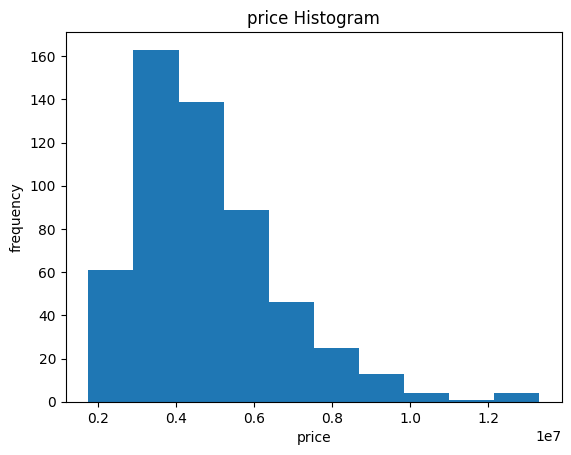

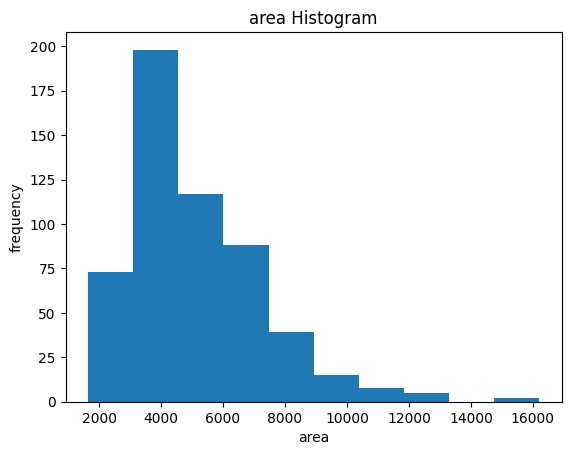

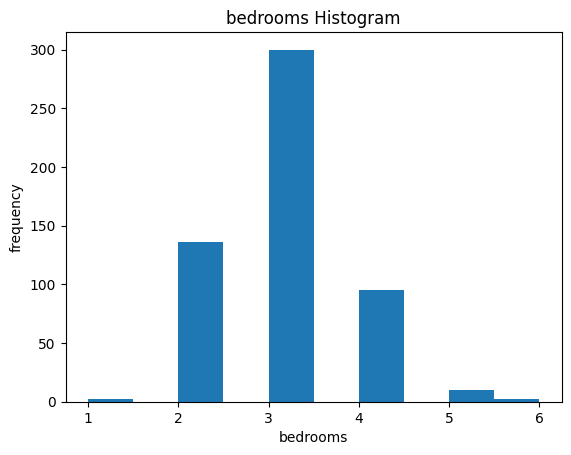

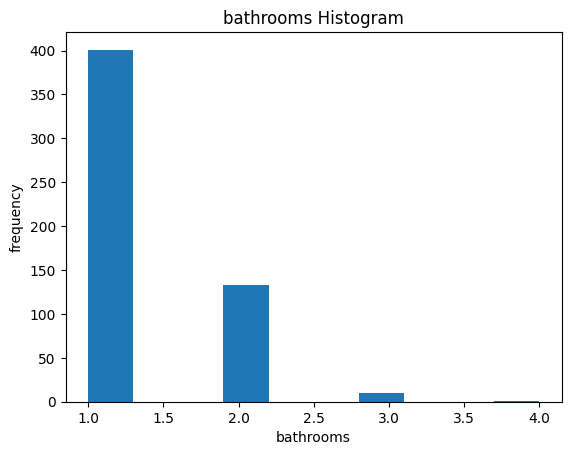

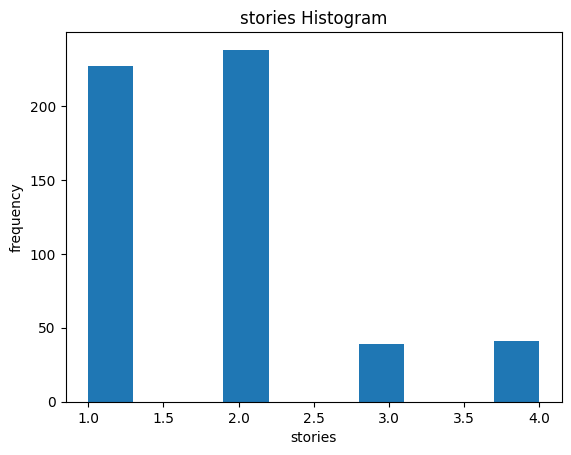

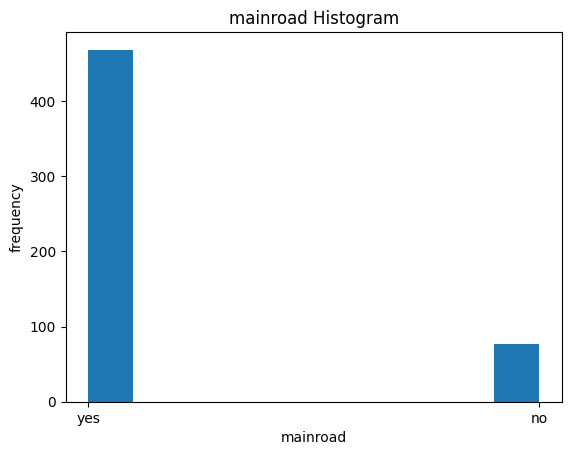

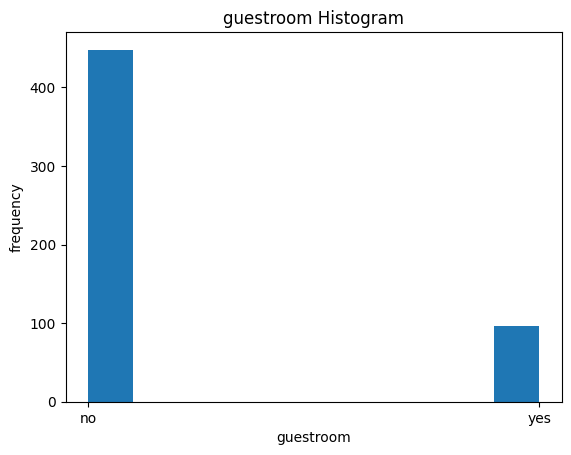

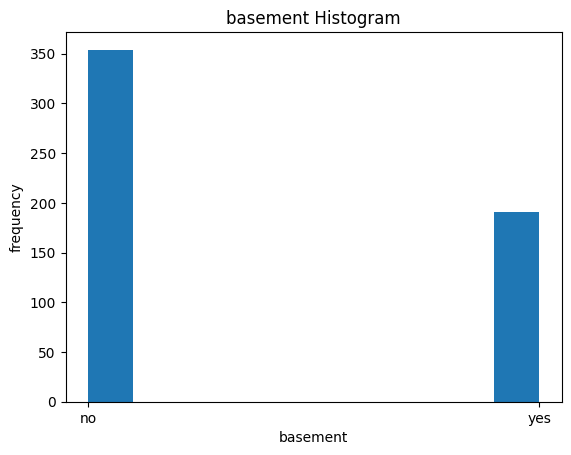

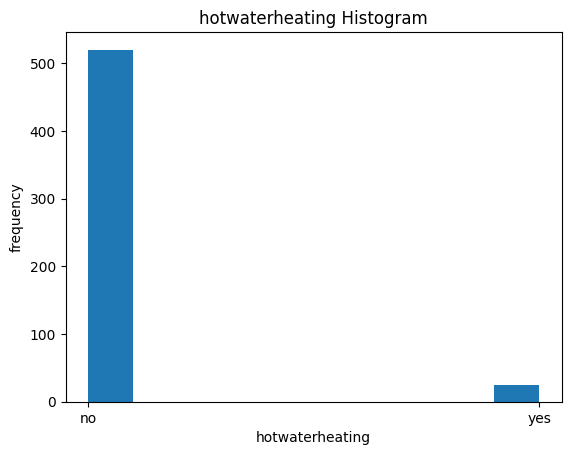

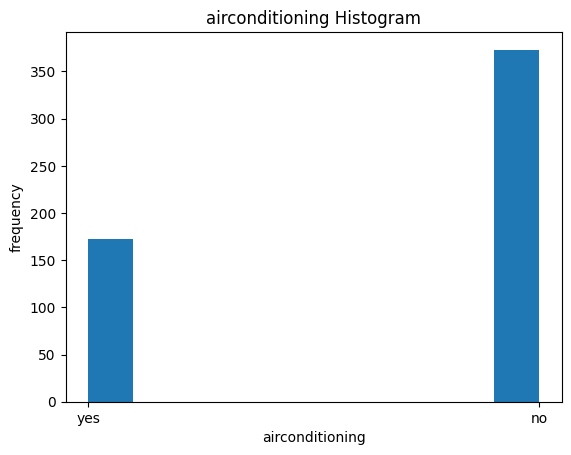

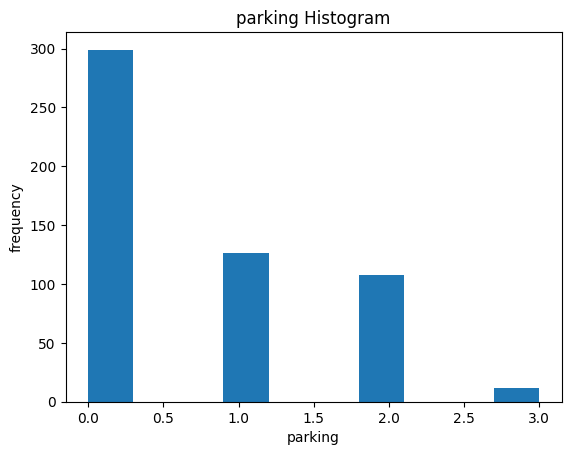

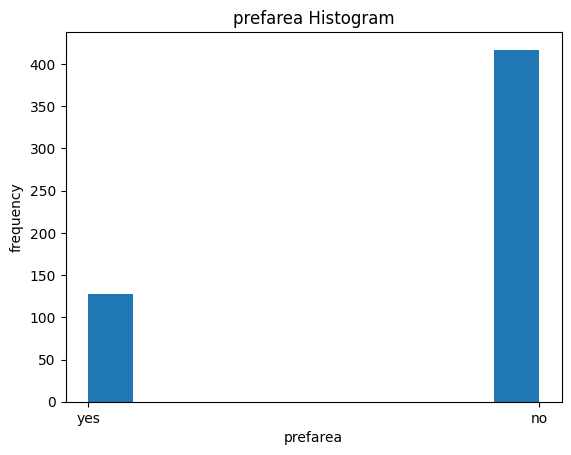

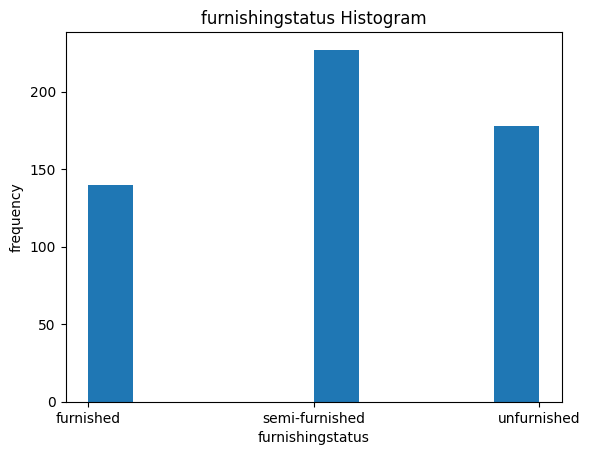

In [8]:
for i in df.columns:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.ylabel("frequency")
    plt.title(i + " Histogram")
    plt.show()

In [9]:
df.groupby("bedrooms").bedrooms.count()

bedrooms
1      2
2    136
3    300
4     95
5     10
6      2
Name: bedrooms, dtype: int64

In [10]:
df.groupby(["bedrooms","bathrooms"]).price.max()

bedrooms  bathrooms
1         1             3150000
2         1             7070000
          2             6685000
3         1             9800000
          2            12250000
          3            10850000
4         1            11410000
          2            13300000
          3            10150000
          4            12250000
5         1             8120000
          2             8400000
          3            10150000
6         1             3500000
          2             6083000
Name: price, dtype: int64

In [12]:
for i in df.columns:
    print(i)

price
area
bedrooms
bathrooms
stories
mainroad
guestroom
basement
hotwaterheating
airconditioning
parking
prefarea
furnishingstatus


dtype('int64')

In [19]:
cols_with_categorical_values = list(n for n in df.columns if df[n].dtypes == "object")
cols_with_categorical_values

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [24]:
len(df.mainroad.unique())

2

In [26]:
cardinality_of_cat_cols = {n: len(df[n].unique()) for n in cols_with_categorical_values}
cardinality_of_cat_cols

{'mainroad': 2,
 'guestroom': 2,
 'basement': 2,
 'hotwaterheating': 2,
 'airconditioning': 2,
 'prefarea': 2,
 'furnishingstatus': 3}

In [28]:
catname_of_cat_cols = {n: list(df[n].unique()) for n in cols_with_categorical_values}
catname_of_cat_cols

{'mainroad': ['yes', 'no'],
 'guestroom': ['no', 'yes'],
 'basement': ['no', 'yes'],
 'hotwaterheating': ['no', 'yes'],
 'airconditioning': ['yes', 'no'],
 'prefarea': ['yes', 'no'],
 'furnishingstatus': ['furnished', 'semi-furnished', 'unfurnished']}

In [30]:
mapping = {"yes": 1, "no": 0}
for i in [key for key, value in cardinality_of_cat_cols.items() if value == 2]:
    df[i].map(mapping)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = df.drop(["price"], axis=1)
y = df.price
X_train, y_train, X_test, y_test = train_test_split(X, y, random_state=0, shuffle=True, test_size=0.3)

In [40]:
from sklearn.preprocessing import OneHotEncoder
OH_encode = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded_labeles_train = pd.DataFrame(OH_encode.fit_transform([X_train['furnishingstatus']]))
encoded_labeles_test = pd.DataFrame(OH_encode.transform([X_train['furnishingstatus']]))

In [41]:
encoded_labeles_train

,0,1,2,3,4,5,6,7,8,9,...,371,372,373,374,375,376,377,378,379,380
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
